# Dataset Introduction

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_excel("Dataset1_ HR-EmployeeAttrition.xlsx")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [60]:
df['MonthlyIncome'].dtype #variable continue

dtype('float64')

In [61]:
df['EnvironmentSatisfaction'].unique() #this is actually a categorical variable

array([ 2.,  3.,  4.,  1., nan])

In [62]:
def moyenne(df, d):
    return float("{:.2f}".format(df[d].sum() / df[d].count()))

def median(df, d): 
    colonne_sorted = list(df[d].sort_values())
    n = len(df[d])
    return ((colonne_sorted[n//2] + colonne_sorted[n//2 + 1]) / 2) if n % 2 == 0 else colonne_sorted[(n+1)/2]

def mode(df, d):
    l = []
    l.append(df[d].value_counts().index)
    l.append(list(df[d].value_counts()))
    mod = [l[0][0]]
    for i in range(1, len(l[0])):
        if l[1][i] == l[1][0]:
            mod.append(l[0][i])
        else:
            break
    return mod if len(mod) > 1 else [] if len(mod) == len(df[d]) else mod[0]



In [63]:
def ecart_moyen(df, d):
    em = []
    m = moyenne(df, d)
    for d in df[d]:
        em.append(float("{:.2f}".format(np.abs(d-m))))
    return em

def variance(df, d):
    em_sum = []
    m = moyenne(df, d)
    n = len(df[d])
    for d in df[d]:
        em_sum.append(np.power((d - m), 2))
    return float("{:.2f}".format(sum(em_sum) / n))

def ecart_type(var):
    return float("{:.2f}".format(np.sqrt(var)))

def quartilles(df, d):
    colonne_sorted = list(df[d].sort_values())
    n = len(df[d])
    return [min(colonne_sorted), colonne_sorted[n // 4], colonne_sorted[(n * 3) // 4], max(colonne_sorted)]

def iqr(quart):
    return quart[2] - quart[1] 


# Traitement de valeurs

## a. Remplacement de valeurs manquantes

In [64]:
#Showing variables with missing values
df[df.columns[df.isnull().any()]].isnull().sum()


EnvironmentSatisfaction    13
MonthlyIncome               8
dtype: int64

<AxesSubplot:>

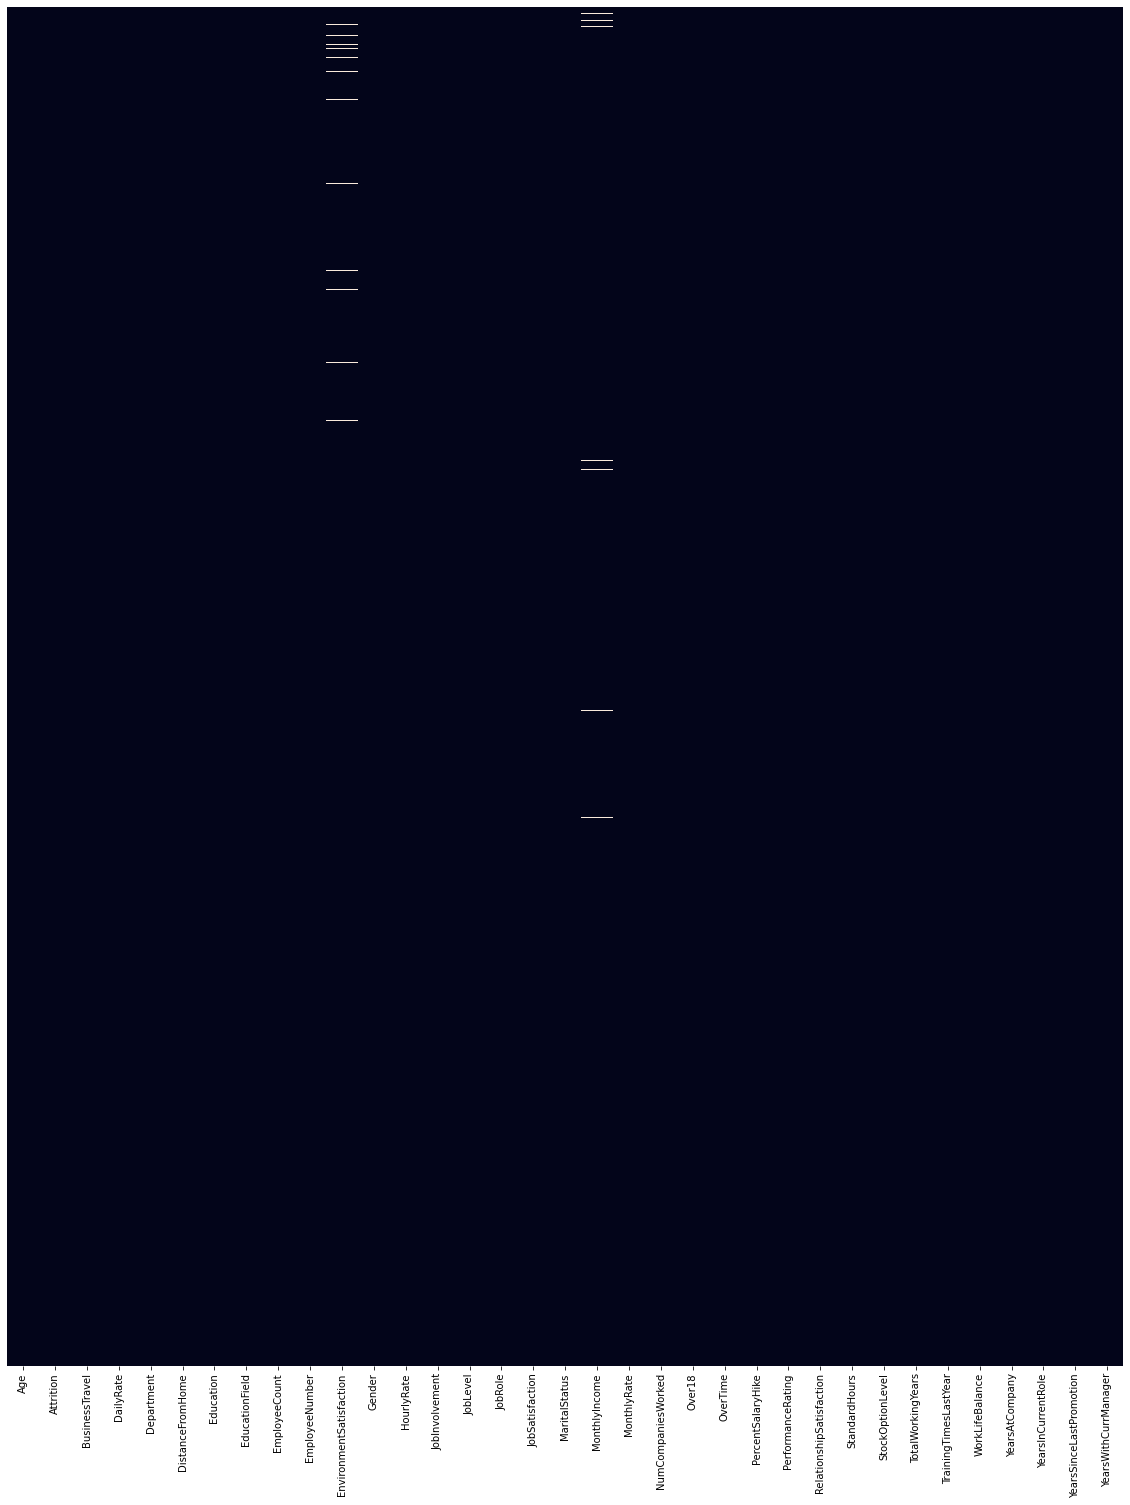

In [65]:
plt.figure(figsize=(20,25))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Les méthodes possibles:


#### Mean, median & mode imputation


In [66]:
import math

In [67]:
df1 = df.copy()

In [68]:
#imputation par moyenne
df1['MonthlyIncome'].replace(np.nan, moyenne(df1,'MonthlyIncome'), inplace=True)
df1['EnvironmentSatisfaction'].replace(np.nan, math.floor(moyenne(df1,'EnvironmentSatisfaction')), inplace=True) #pessimiste
df1['EnvironmentSatisfaction'].replace(np.nan, math.ceil(moyenne(df1,'EnvironmentSatisfaction')), inplace=True) #optimiste

In [69]:
#imputation par mediane
df1['MonthlyIncome'].replace(np.nan, median(df1,'MonthlyIncome'), inplace=True)
df1['EnvironmentSatisfaction'].replace(np.nan, median(df1,'EnvironmentSatisfaction'), inplace=True)

In [70]:
#imputation par mode 
df1['MonthlyIncome'].replace(np.nan, mode(df1,'MonthlyIncome'), inplace=True)
df1['EnvironmentSatisfaction'].replace(np.nan, mode(df1,'EnvironmentSatisfaction'), inplace=True)

#### Substitution


In [71]:
df2 = df.copy()

In [72]:
#forward fill
def ffill(df, d): 
    df[d].replace(np.nan, df.loc[df[d].first_valid_index()][d], inplace=True)

In [73]:
#backward fill
def bfill(df, d): 
    df[d].replace(np.nan, df.loc[df[d].last_valid_index()][d], inplace=True)

In [74]:
df2[df2.columns[df2.isnull().any()]].isnull().sum()

EnvironmentSatisfaction    13
MonthlyIncome               8
dtype: int64

In [75]:
bfill(df2, 'EnvironmentSatisfaction')
#OR
ffill(df2, 'EnvironmentSatisfaction')

df2[df2.columns[df2.isnull().any()]].isnull().sum()

MonthlyIncome    8
dtype: int64

In [76]:
bfill(df2, 'MonthlyIncome')
#OR
ffill(df2, 'MonthlyIncome')
df2[df2.columns[df2.isnull().any()]].isnull().sum()

Series([], dtype: float64)

####    Linear Regression imputation

In [77]:
df3 = df.copy()
df3[df3.columns[df3.isnull().any()]].isnull().sum()

EnvironmentSatisfaction    13
MonthlyIncome               8
dtype: int64

In [78]:
#Pour faire une bonne regression lineaire, il faut commencer par la feature selection
#plt.figure(figsize=(25,20))
#sns.heatmap(corr,annot=True,lw=1)
corr = df3.corr()

In [79]:
cor_tar = abs(corr['MonthlyIncome'])
relevant_features = cor_tar[cor_tar>0.5]
relevant_features.dtypes

dtype('float64')

In [80]:
df3 = df3[relevant_features.index]
df3.head()

,Age,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,41.0,2.0,5993.0,8.0,6.0
1,49.0,2.0,5130.0,10.0,10.0
2,37.0,1.0,2090.0,7.0,0.0
3,33.0,1.0,2909.0,8.0,8.0
4,27.0,1.0,3468.0,6.0,2.0


In [81]:
testdf = df3[df3['MonthlyIncome'].isnull()==True] #the missing values we should be predicting
traindf = df3[df3['MonthlyIncome'].isnull()==False]
y = traindf['MonthlyIncome']
traindf.drop("MonthlyIncome",axis=1,inplace=True) #take off the values to be predicted
testdf.drop("MonthlyIncome",axis=1,inplace=True) #take off the values to be predicted

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(traindf, y)
lrpred = lr.predict(testdf)
testdf['MonthlyIncome'] = lrpred
testdf['MonthlyIncome']

6       2387.769221
14      2280.961780
20      6049.146542
35      2113.832818
490     2366.362334
500     5999.612217
760    10933.239481
876     2143.598330
Name: MonthlyIncome, dtype: float64

#### Logistic regression imputation

In [83]:
df4 = df.copy()
df4[df4.columns[df4.isnull().any()]].isnull().sum()

EnvironmentSatisfaction    13
MonthlyIncome               8
dtype: int64

In [84]:
corrl = df4.corr()

In [85]:
cor_tarl = abs(corrl['EnvironmentSatisfaction'])
relevant_featuresl = cor_tarl[cor_tarl>0.04]
relevant_featuresl

EnvironmentSatisfaction    1.000000
HourlyRate                 0.049465
MonthlyRate                0.040355
Name: EnvironmentSatisfaction, dtype: float64

In [86]:
df4 = df4[relevant_featuresl.index]
df4.head()

,EnvironmentSatisfaction,HourlyRate,MonthlyRate
0,2.0,94.0,19479.0
1,3.0,61.0,24907.0
2,4.0,92.0,2396.0
3,4.0,56.0,23159.0
4,1.0,40.0,16632.0


In [87]:
testdfl = df4[df4["EnvironmentSatisfaction"].isnull()==True] #the missing values we should be predicting
traindfl = df4[df4["EnvironmentSatisfaction"].isnull()==False]
yl = traindfl["EnvironmentSatisfaction"]
traindfl.drop("EnvironmentSatisfaction",axis=1,inplace=True)
testdfl.drop("EnvironmentSatisfaction",axis=1,inplace=True)

In [88]:
from sklearn.linear_model import LogisticRegression
lrl = LogisticRegression()
lrl.fit(traindfl, yl)
lrpredl = lrl.predict(testdfl)
testdfl['EnvironmentSatisfaction'] = lrpredl
testdfl['EnvironmentSatisfaction']

8      3.0
18     3.0
30     3.0
40     3.0
44     3.0
54     4.0
69     3.0
99     4.0
190    3.0
284    4.0
305    3.0
384    3.0
447    3.0
Name: EnvironmentSatisfaction, dtype: float64

### Remplir les valeurs manquantes du dataset avec la regression

In [89]:
df["EnvironmentSatisfaction"][df["EnvironmentSatisfaction"].isnull()] =lrpredl #logistic


In [90]:
df["MonthlyIncome"][df["MonthlyIncome"].isnull()] = lrpred #linear

In [91]:
df[df.columns[df.isnull().any()]].isnull().sum() #no missing values anymore.

Series([], dtype: float64)

## b. Traitement de valeurs abberantes

In [92]:
from pandas.api.types import is_numeric_dtype
def outlierss(df):
    mesures_de_dispersion = {}
    for d in df:
        mdd = {}
        if is_numeric_dtype(df[d]):
            em = ecart_moyen(df, d)
            mdd["Ecart moyen"] = [min(em), max(em)]
            mdd["Variance"] = median(df, d)
            mdd["Ecart type"] = ecart_type(mdd["Variance"])
            quart = quartilles(df, d)
            quart_name = ["Minimum", "Q1", "Q3", "Maximum"]
            for q, qm in zip(quart, quart_name):
                mdd[qm] = q
            mdd["IQR"] = iqr(quart)
            Outliers = [x for x in df[d] if (x > (mdd["Q3"] + 1.5 * mdd["IQR"])) or (x < (mdd["Q1"] - 1.5 * mdd["IQR"]))]
            mdd["Donnees aberanttes"] = "Aucune" if len(Outliers) == 0 else set(Outliers)
            mesures_de_dispersion[d] = mdd
    return pd.DataFrame.from_dict(mesures_de_dispersion, orient='index')

In [93]:
df5 = df.copy()

In [94]:
#Showing variables with 
dfff =outlierss(df5)
dfff['Donnees aberanttes'][dfff['Donnees aberanttes'] != 'Aucune']

MonthlyIncome              {18947.0, 17924.0, 19973.0, 17426.0, 19999.0, ...
NumCompaniesWorked                                                     {9.0}
PerformanceRating                                                      {4.0}
StockOptionLevel                                                       {3.0}
TotalWorkingYears          {32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 40....
TrainingTimesLastYear                                        {0.0, 5.0, 6.0}
YearsAtCompany             {32.0, 33.0, 34.0, 36.0, 37.0, 40.0, 19.0, 20....
YearsInCurrentRole                                  {16.0, 17.0, 18.0, 15.0}
YearsSinceLastPromotion       {8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0}
YearsWithCurrManager                                      {16.0, 17.0, 15.0}
Name: Donnees aberanttes, dtype: object

In [95]:
#garder trace des valeurs abberrantes car on ne peut pas creer un dataframe avec des longueurs differentes de lignes
dicto = dict(dfff['Donnees aberanttes'][dfff['Donnees aberanttes'] != 'Aucune'])
dicto['StockOptionLevel']

{3.0}

In [96]:
dff = pd.DataFrame.from_dict(dicto, orient='index')
dff.loc['MonthlyIncome'].values

array([18947., 17924., 19973., 17426., 19999., 17444., 19502., 19513.,
       17465., 19517., 16959., 19537., 19033., 19545., 19038., 19045.,
       19049., 19566., 17007., 18041., 19068., 19586., 19081., 18061.,
       19094., 17046., 17048., 19613., 17567., 19626., 19627., 17068.,
       18606., 17584., 19636., 17603., 19141., 19144., 19658., 17099.,
       19665., 16595., 16598., 19161., 16606., 17123., 17639., 18665.,
       17650., 16627., 19187., 19189., 19190., 19701., 18172., 19197.,
       17665., 19202., 19717., 17159., 17169., 16659., 17174., 18711.,
       18200., 19740., 17181., 19232., 18722., 19237., 18213., 19246.,
       18740., 16704., 19272., 18265., 18789., 16752., 17779., 16756.,
       19833., 18300., 18303., 19328., 19331., 19845., 19847., 18824.,
       19859., 16792., 18844., 16799., 17328., 16823., 17856., 19392.,
       18880., 16835., 17861., 19406., 17875., 19926., 16856., 19419.,
       19943., 16872., 19431., 19436., 16880., 16885., 17399., 18430.])

In [97]:
df6 = df.copy() #creer un autre dataset pour calculer les tendances sans les outliers
for d in dff.index:
    df6[d][df6[d].isin(dff.loc[d].values)] = np.nan

In [98]:
df6.isna().sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtC

In [99]:
df6.dropna(axis=0, inplace=True)
len(df6)

779

In [100]:
for d in dff.index:
    print(df5[d][df5[d].isin(dff.loc[d].values)])

25      19094.0
29      18947.0
45      19545.0
62      18740.0
105     18844.0
         ...   
1374    17875.0
1377    19161.0
1401    19636.0
1437    19431.0
1443    18880.0
Name: MonthlyIncome, Length: 114, dtype: float64
4       9.0
38      9.0
50      9.0
95      9.0
105     9.0
122     9.0
194     9.0
198     9.0
208     9.0
245     9.0
287     9.0
290     9.0
334     9.0
371     9.0
372     9.0
385     9.0
393     9.0
401     9.0
440     9.0
447     9.0
456     9.0
525     9.0
541     9.0
544     9.0
551     9.0
575     9.0
597     9.0
617     9.0
623     9.0
660     9.0
714     9.0
717     9.0
756     9.0
770     9.0
779     9.0
789     9.0
816     9.0
837     9.0
927     9.0
947     9.0
957     9.0
1000    9.0
1035    9.0
1117    9.0
1145    9.0
1162    9.0
1172    9.0
1219    9.0
1262    9.0
1296    9.0
1357    9.0
1442    9.0
Name: NumCompaniesWorked, dtype: float64
1       4.0
6       4.0
7       4.0
8       4.0
21      4.0
       ... 
1441    4.0
1445    4.0
1446    4.0
14

In [101]:
def treat_outlier(tendance, df5, outliers): #######################################################NOT REPLACING ALL VALUES FOR SOME REASON########################################################################3333333
    for d in outliers.index:
        df5[d][df5[d].isin(outliers.loc[d].values)] = np.full(shape=len(df5[d][df5[d].isin(outliers.loc[d].values)]), fill_value= tendance(df6,d), dtype=np.float)

In [102]:
treat_outlier(moyenne, df5, dff)

In [103]:
for d in dff.index: #no more outliers left
    print(df5[d][df5[d].isin(dff.loc[d].values)])

Series([], Name: MonthlyIncome, dtype: float64)
Series([], Name: NumCompaniesWorked, dtype: float64)
Series([], Name: PerformanceRating, dtype: float64)
Series([], Name: StockOptionLevel, dtype: float64)
Series([], Name: TotalWorkingYears, dtype: float64)
Series([], Name: TrainingTimesLastYear, dtype: float64)
Series([], Name: YearsAtCompany, dtype: float64)
Series([], Name: YearsInCurrentRole, dtype: float64)
Series([], Name: YearsSinceLastPromotion, dtype: float64)
Series([], Name: YearsWithCurrManager, dtype: float64)


In [104]:
def compare_outliers(before, after,dff): #pour comparer avant et apres le remplacement des outliers
    for d in dff.index:
        fig, axes = plt.subplots(1,2, figsize=(15, 15))
        axes[0].boxplot(before[d])
        axes[0].set_title("Boxplot of the sample before treating the outliers   " +d)
        axes[1].boxplot(after[d])
        axes[1].set_title("Boxplot of the sample after treating the outliers    " +d)

In [105]:
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
MonthlyIncome,18947.0,17924.0,19973.0,17426.0,19999.0,17444.0,19502.0,19513.0,17465.0,19517.0,...,16856.0,19419.0,19943.0,16872.0,19431.0,19436.0,16880.0,16885.0,17399.0,18430.0
NumCompaniesWorked,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PerformanceRating,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockOptionLevel,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalWorkingYears,32.0,33.0,34.0,35.0,36.0,37.0,38.0,40.0,29.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


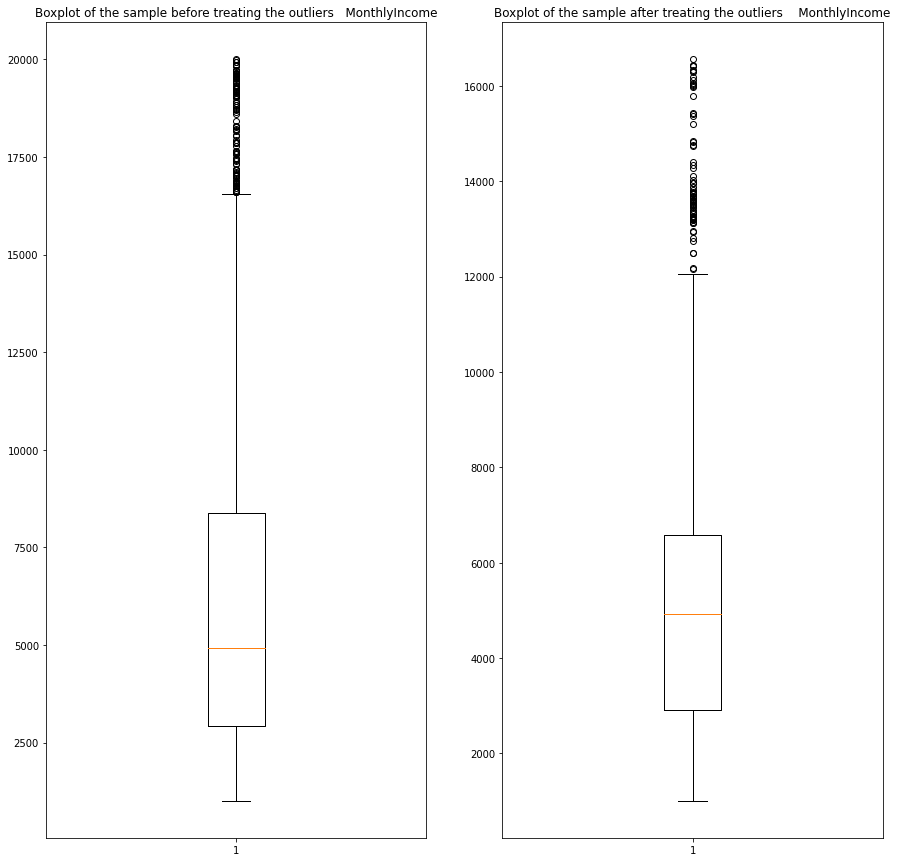

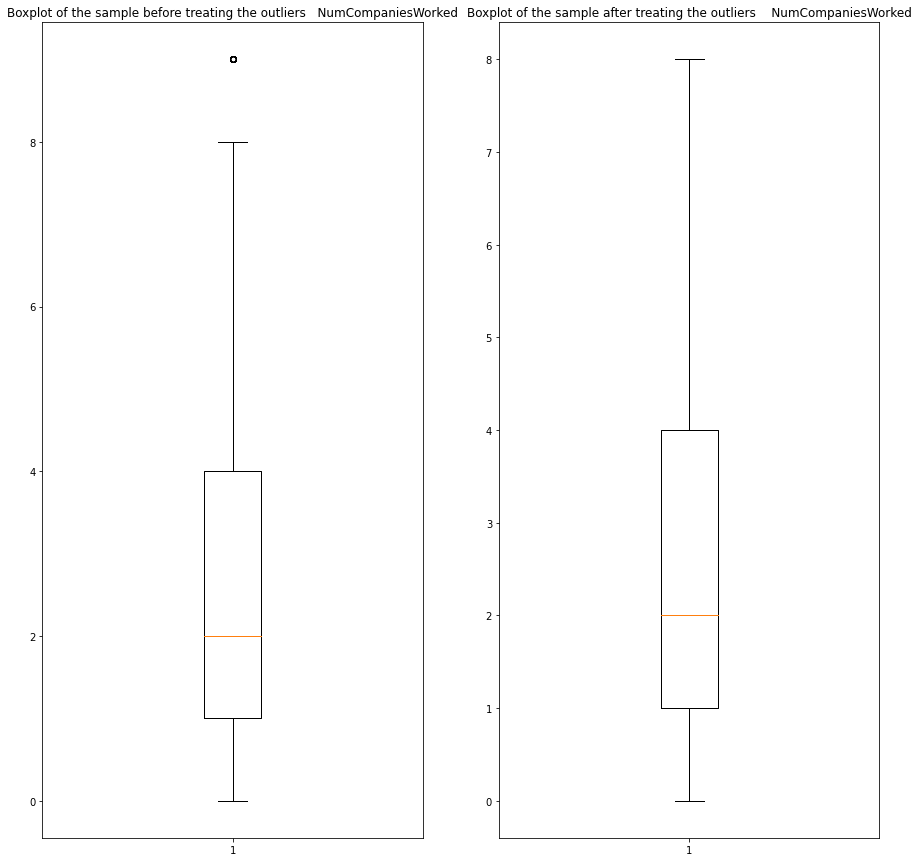

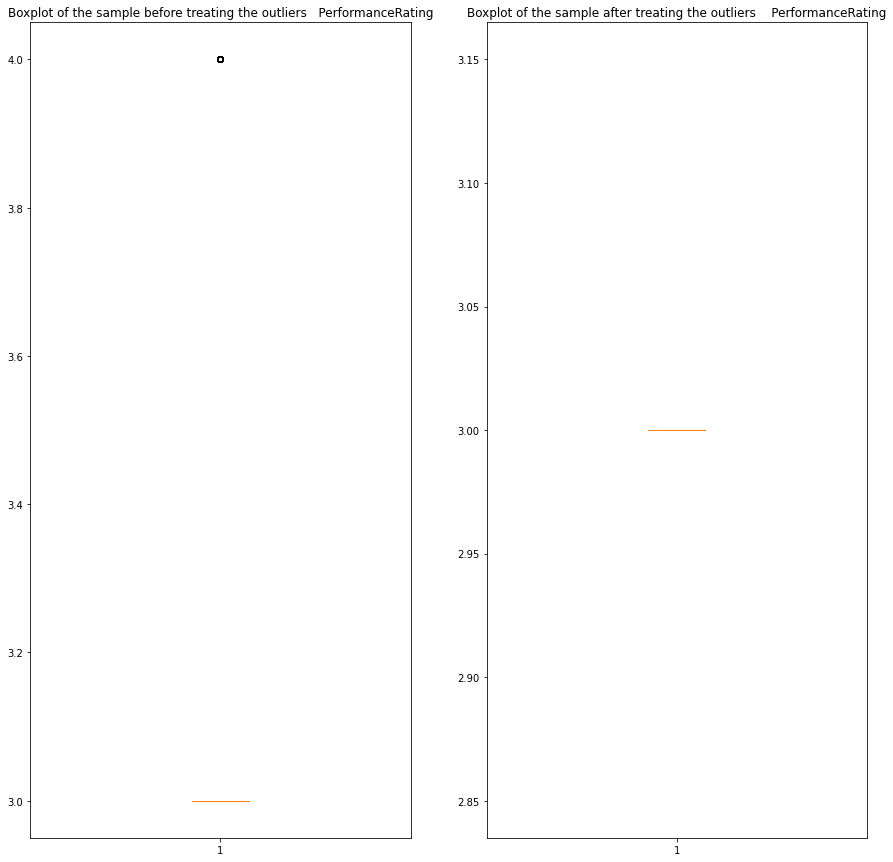

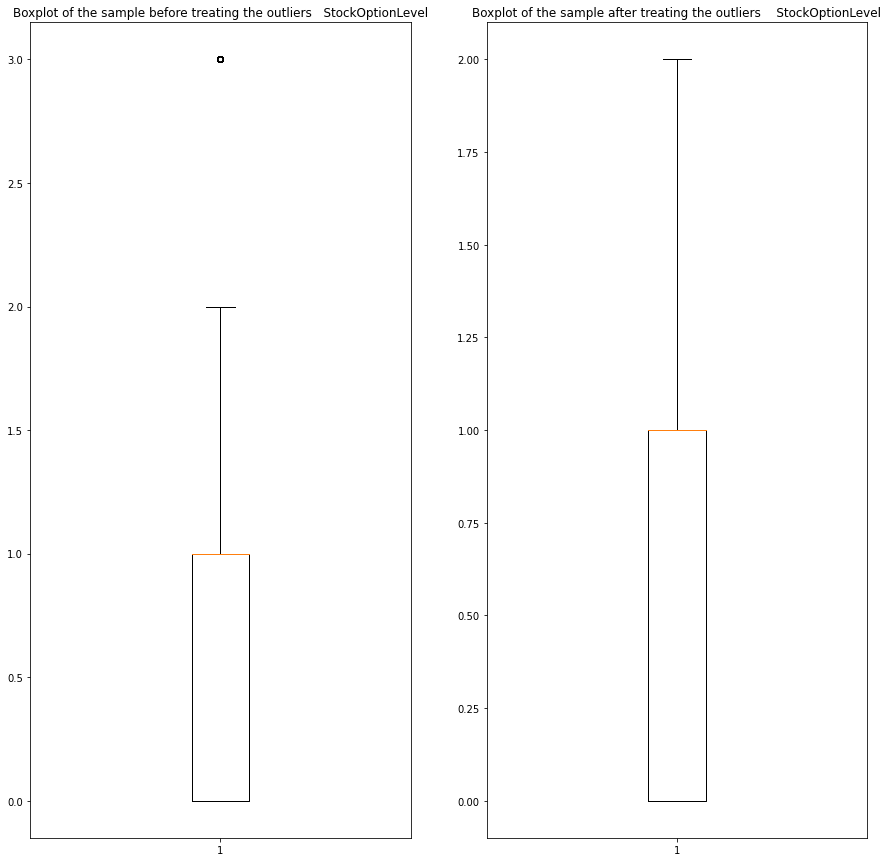

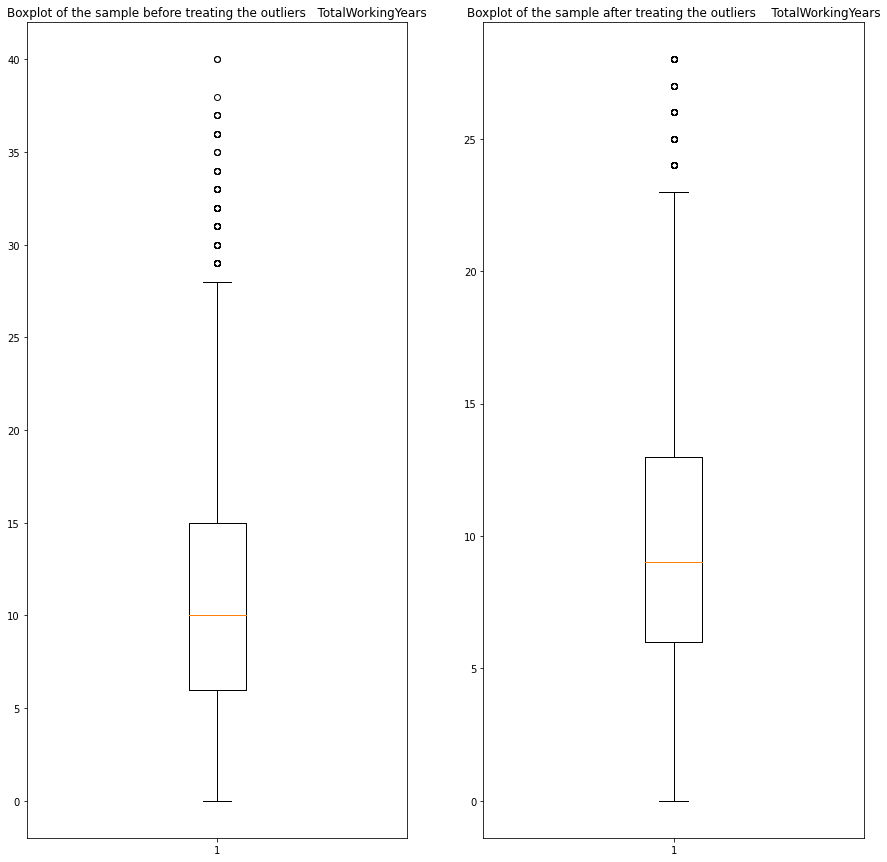

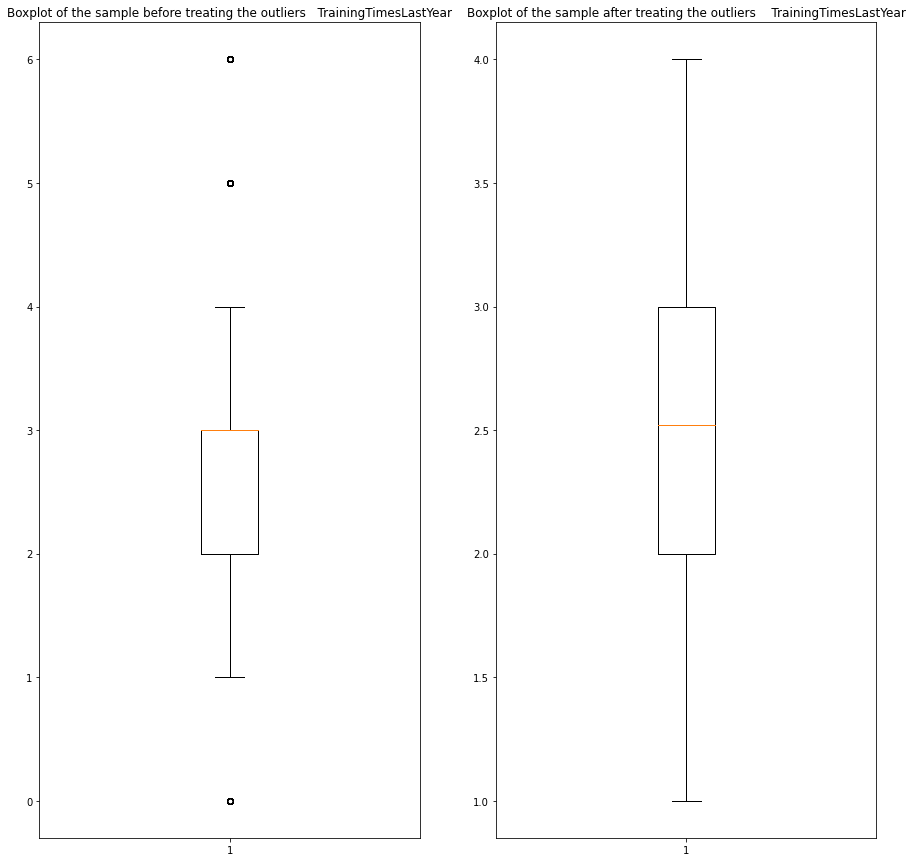

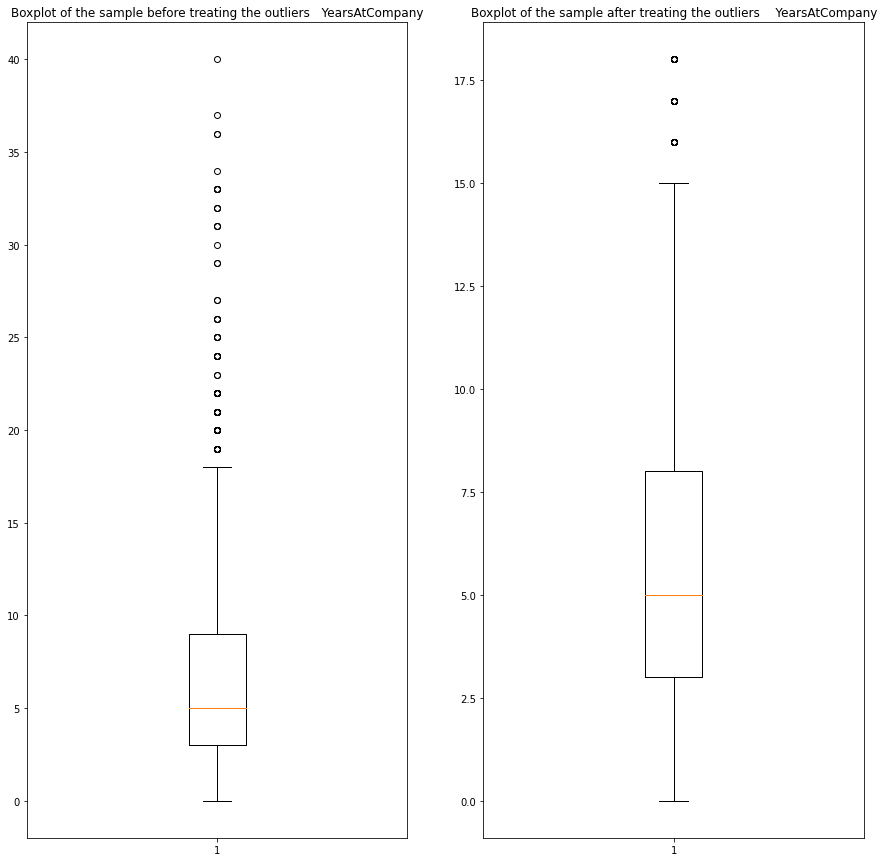

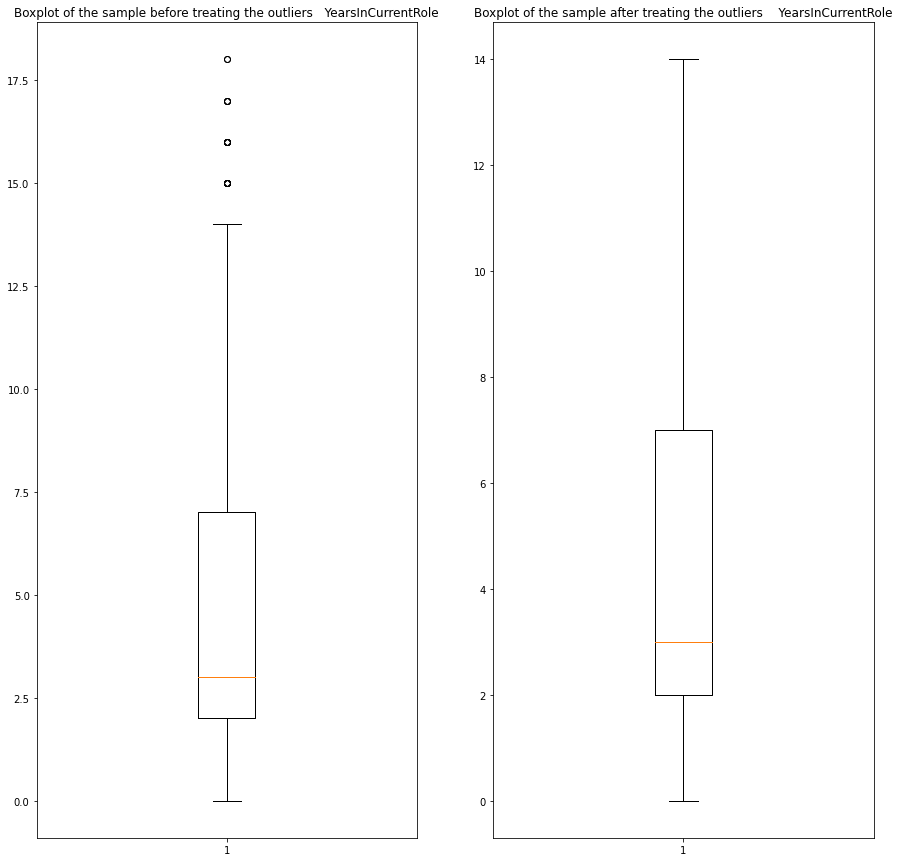

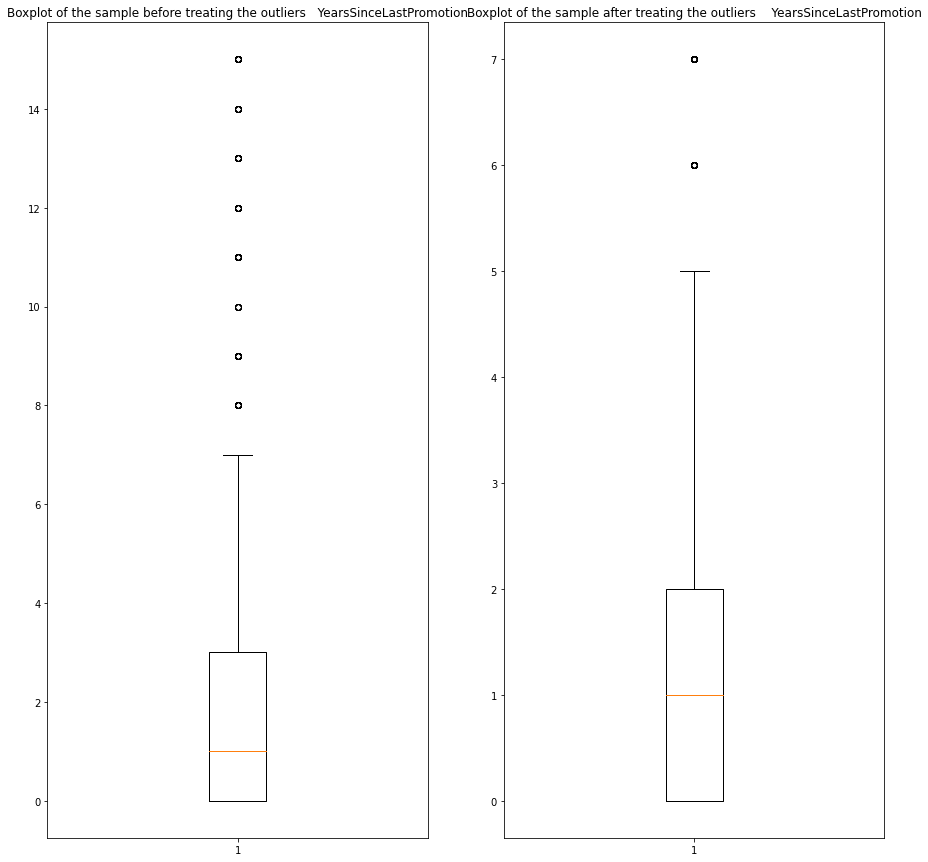

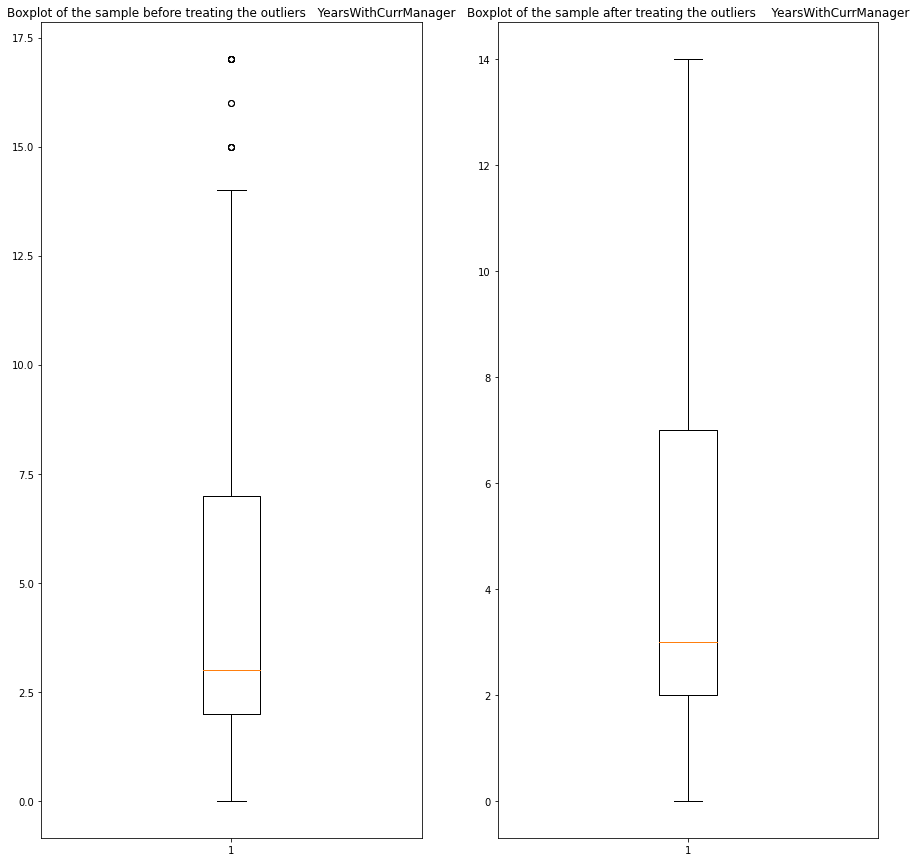

In [106]:
compare_outliers(df, df5, dff)

# Réduction de données via la discrétisation de données continues

In [107]:
def make_plot(X):

    apres = ['Age_Bins',
       'DailyRate_Bins', 'DistanceFromHome_Bins', 'EmployeeNumber_Bins',
       'HourlyRate_Bins', 'MonthlyIncome_Bins', 'MonthlyRate_Bins',
       'NumCompaniesWorked_Bins', 'PercentSalaryHike_Bins',
       'TotalWorkingYears_Bins', 'TrainingTimesLastYear_Bins',
       'WorkLifeBalance_Bins', 'YearsAtCompany_Bins',
       'YearsInCurrentRole_Bins', 'YearsSinceLastPromotion_Bins',
       'YearsWithCurrManager_Bins']
    avant = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager']

    for k,v in zip(avant, apres):
        fig, axes = plt.subplots(1,2,figsize=(12,6))
        sns.countplot(x=X[k], ax= axes[0])
        sns.countplot(x=X[v], ax=axes[1])
        axes[0].set_title("Before Binning {k}")
        axes[1].set_title("After Binning {v}")
        plt.show()

## a. Classes d'amplitudes égales :	les classes possèdent la même amplitude

Utilisée pour les formes de distribution uniforme et symétrique

### Benefits : 
#### -Equal Width doesn’t improve the value spread
#### -It can handle outliers
#### -Can be combined with categorical encodings

In [108]:
#only keep continuous variables
df7 = df.copy()
df7 = df7.loc[:, df.dtypes==np.float64]
df7.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [109]:
df7.drop(['Education','EmployeeCount','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel'], axis=1, inplace=True) #drop non continuous variables
df[df7.columns]


,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,2.0,61.0,5130.0,24907.0,1.0,23.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,4.0,92.0,2090.0,2396.0,6.0,15.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,1392.0,3.0,5.0,56.0,2909.0,23159.0,1.0,11.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,2.0,7.0,40.0,3468.0,16632.0,9.0,12.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,2061.0,41.0,2571.0,12290.0,4.0,17.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,613.0,6.0,2062.0,42.0,9991.0,21457.0,4.0,15.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,155.0,4.0,2064.0,87.0,6142.0,5174.0,1.0,20.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0
1468,49.0,1023.0,2.0,2065.0,63.0,5390.0,13243.0,2.0,14.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0


In [110]:
def EqualWidth(df7):
    ats = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
    for d in ats:
        maximum = df7[d].max()
        minimum = df7[d].min()
        rangrang= maximum - minimum 
        k= 1+3*math.log10(len(df7[d]))
        width = int(rangrang/k) 
        min_value = int(np.floor(minimum))
        max_value = int(np.ceil( maximum))
        if(width==0):
            width = 1
        intervals = [i for i in range(min_value, max_value + width,width)]
        df7[f'{d}_Bins'] = pd.cut(x=df7[d], bins=intervals,include_lowest=True)
        t1 = df7[f'{d}_Bins'].value_counts() / len(df7)
        #fig, axes = plt.subplots(1,1, figsize=(5, 5))
        #t1.plot.bar()
        #axes.set_ylabel(f'Observations / Bin {d}')
        #axes.set_title(d)


In [111]:
EqualWidth(df7)

In [112]:
df7.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_Bins',
       'DailyRate_Bins', 'DistanceFromHome_Bins', 'EmployeeNumber_Bins',
       'HourlyRate_Bins', 'MonthlyIncome_Bins', 'MonthlyRate_Bins',
       'NumCompaniesWorked_Bins', 'PercentSalaryHike_Bins',
       'TotalWorkingYears_Bins', 'TrainingTimesLastYear_Bins',
       'WorkLifeBalance_Bins', 'YearsAtCompany_Bins',
       'YearsInCurrentRole_Bins', 'YearsSinceLastPromotion_Bins',
       'YearsWithCurrManager_Bins'],
      dtype='object')

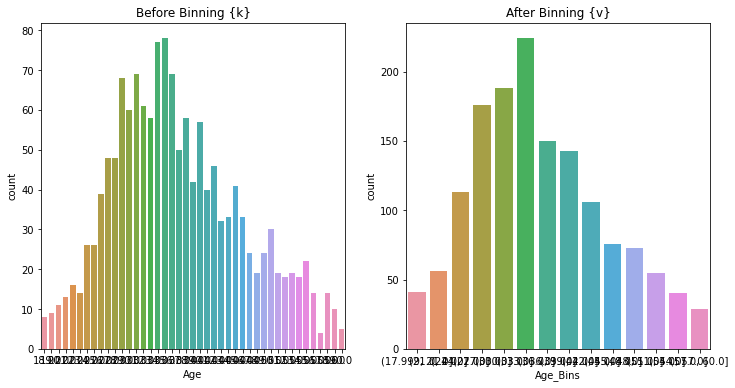

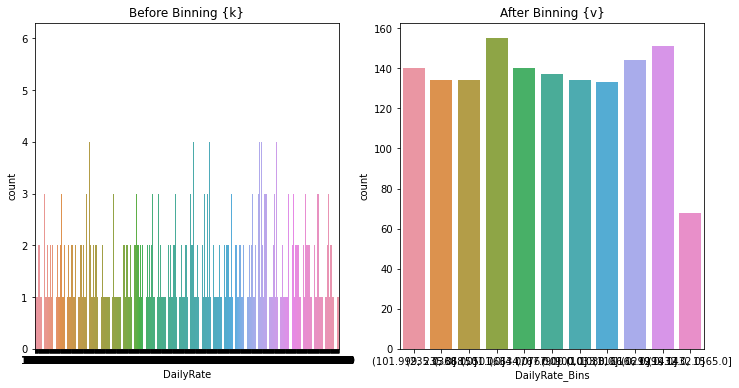

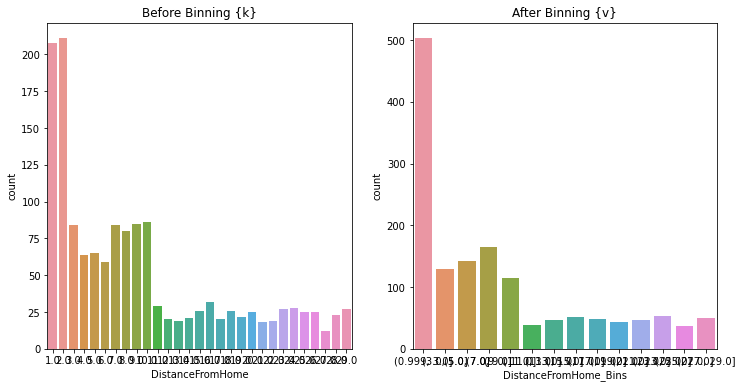

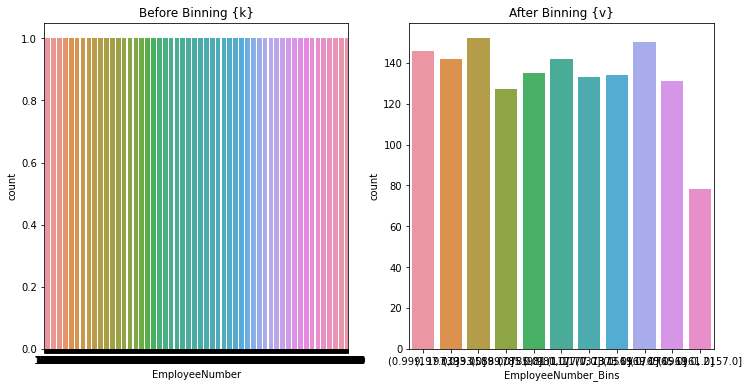

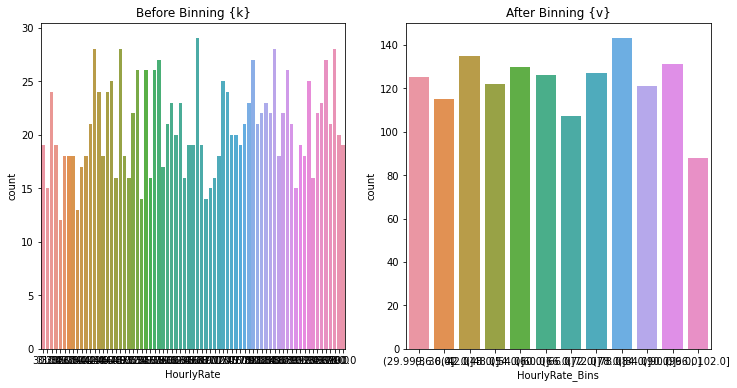

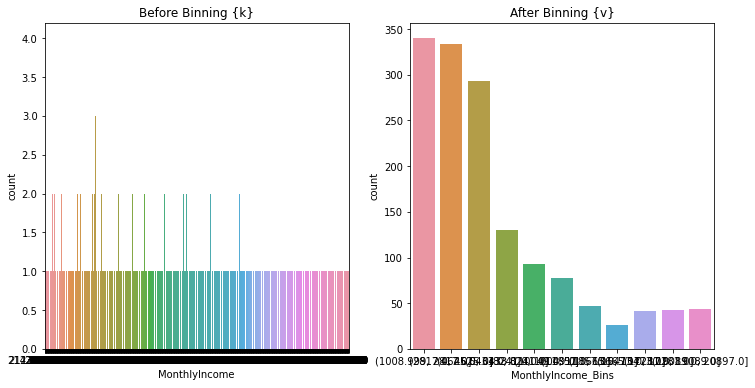

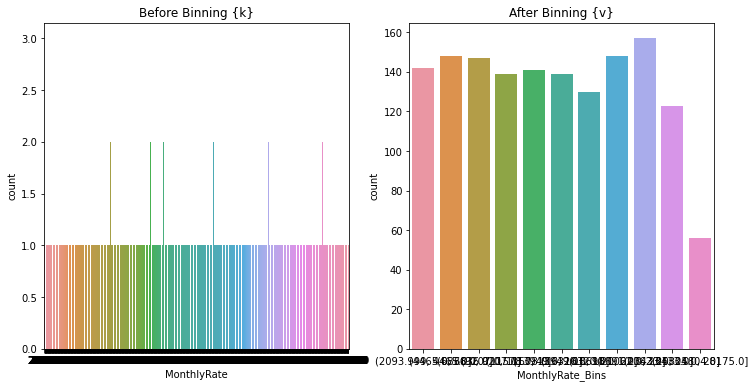

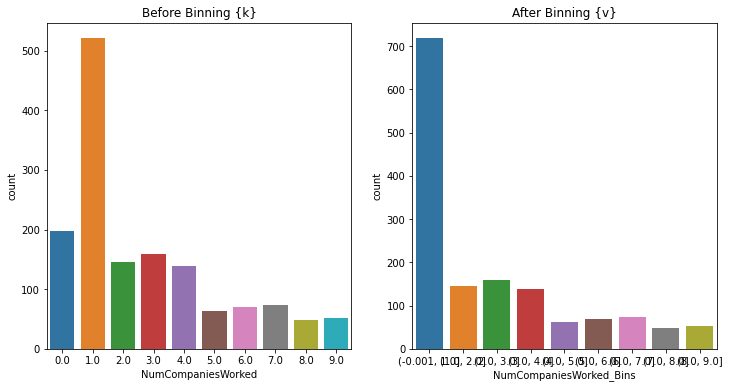

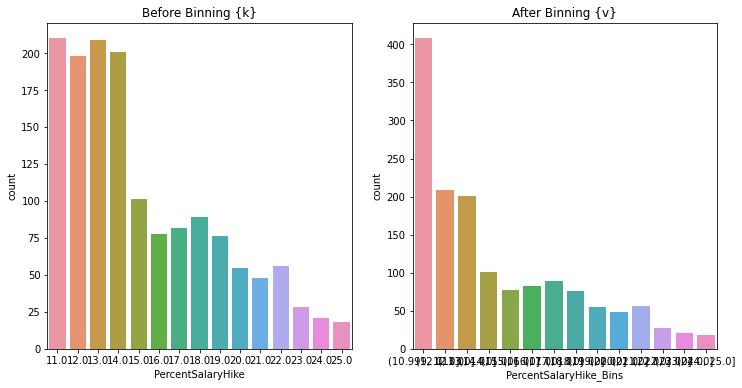

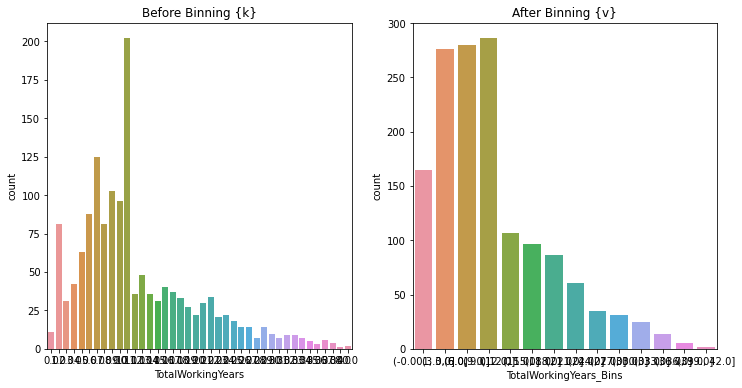

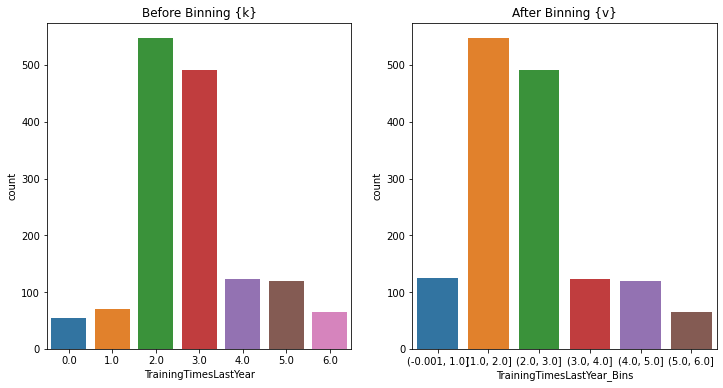

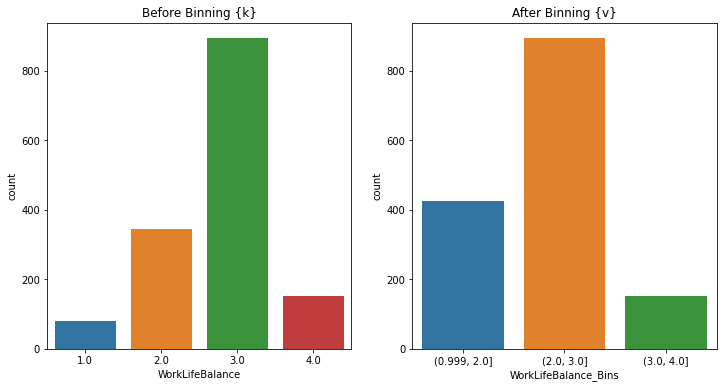

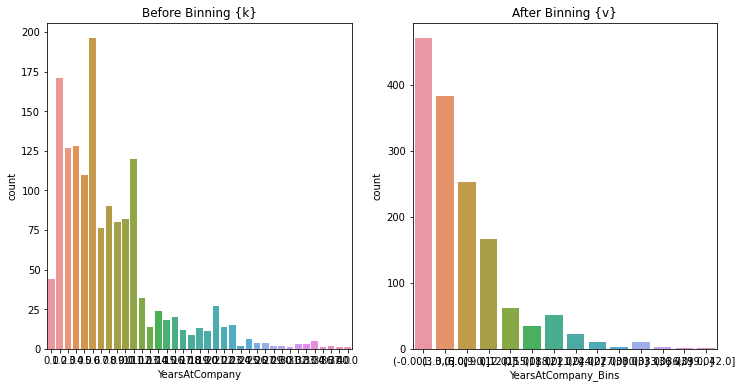

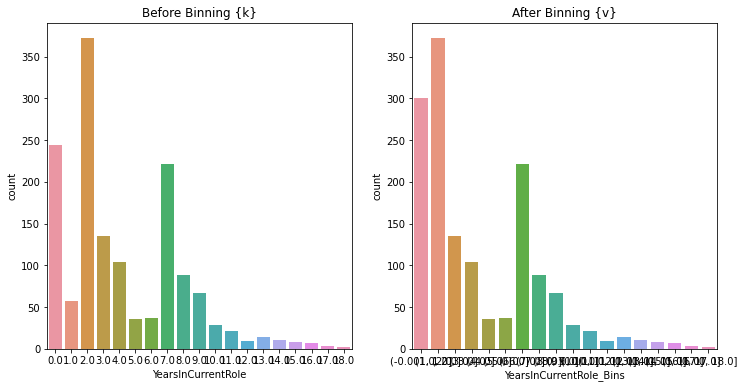

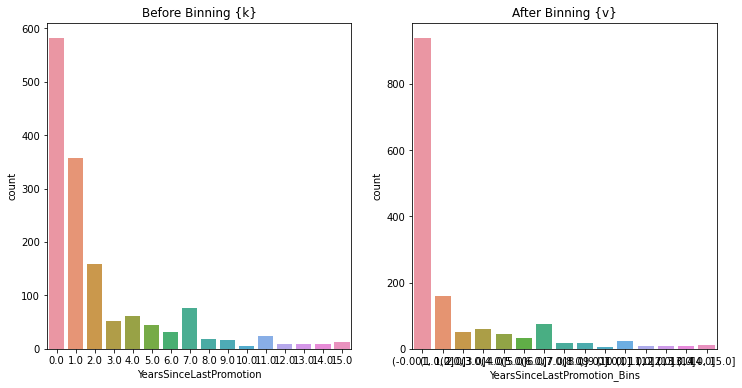

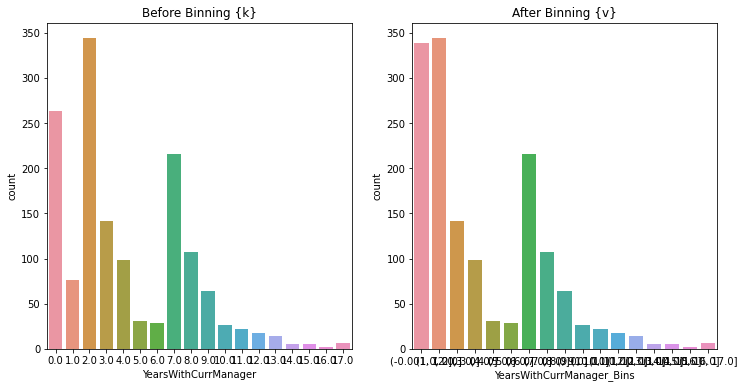

In [113]:
make_plot(df7)

## b. Classes d'effectif égaux : les bornes sont construites en réalisant des classes d’effectifs égaux

Utilisée pour les formes de distribution dysémetrique et bimodale (Equal-Frequency Discretization / quantile discretization)

### Benefits : 
#### -Equal Frequency does improve the value spread
#### -It can handle outliers
#### -Can be combined with categorical encoding

In [114]:
#keeping only the necessary variables
df77 = df.copy()
df77 = df77.loc[:, df.dtypes==np.float64]
df77.drop(['Education','EmployeeCount','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel'], axis=1, inplace=True) #drop non continuous variables
df77.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

##### Essai avec fontion prédéfinie

In [115]:
intervals = None
out, bins = pd.qcut(x = df77['Age'],q= [0, .25, .5, .75, 1.],retbins=True)

In [116]:
out

0         (36.0, 43.0]
1         (43.0, 60.0]
2         (36.0, 43.0]
3         (30.0, 36.0]
4       (17.999, 30.0]
             ...      
1465      (30.0, 36.0]
1466      (36.0, 43.0]
1467    (17.999, 30.0]
1468      (43.0, 60.0]
1469      (30.0, 36.0]
Name: Age, Length: 1470, dtype: category
Categories (4, interval[float64, right]): [(17.999, 30.0] < (30.0, 36.0] < (36.0, 43.0] < (43.0, 60.0]]

In [117]:
bins

array([18., 30., 36., 43., 60.])

##### Essai avec ma fonction

In [118]:
def EqualFreq(df, q):    
    dffffffffff = df.copy()
    all = []
    for d in df.columns:
        a = len(df[d])
        n = int(a / q)
        for i in range(0, q):
            arr = []
            for j in range(i * n, (i + 1) * n):
                if j >= a:
                    break
                arr = arr + [df[d][j]]
            all.extend(arr)
        dffffffffff[d]= pd.Series(all)
    return dffffffffff

In [119]:
def make_plots(X,X_copy):

    for d in X.columns:    
        fig, axes = plt.subplots(1,2,figsize=(12,6))
        sns.countplot(x=X[d], ax= axes[0])
        sns.countplot(x=X_copy[d], ax=axes[1])
        axes[0].set_title(f"Before Binning {d}")
        axes[1].set_title(f"After Binning {d}")
        plt.show()
    

In [120]:
#before
df77.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,2.0,61.0,5130.0,24907.0,1.0,23.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,4.0,92.0,2090.0,2396.0,6.0,15.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,1392.0,3.0,5.0,56.0,2909.0,23159.0,1.0,11.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,2.0,7.0,40.0,3468.0,16632.0,9.0,12.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [121]:
#after
df777=EqualFreq(df77, 3).head()
df777.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
1,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
2,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
3,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
4,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0


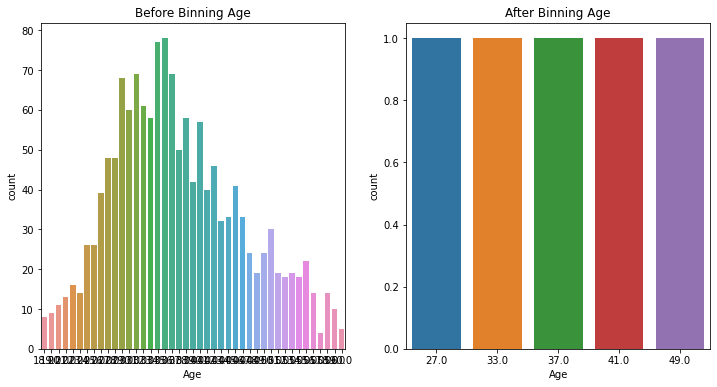

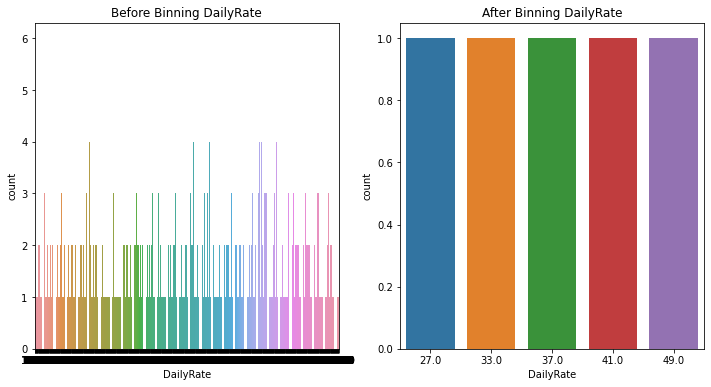

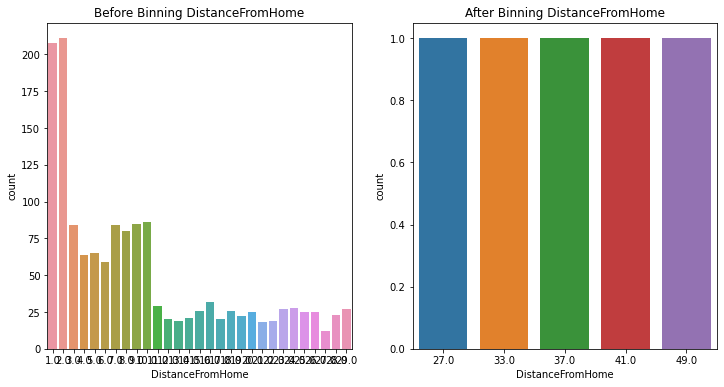

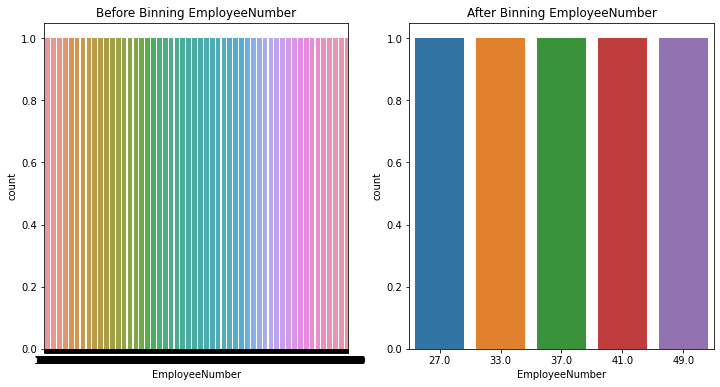

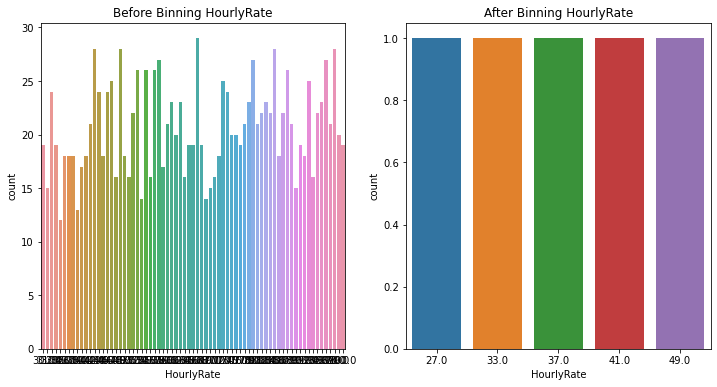

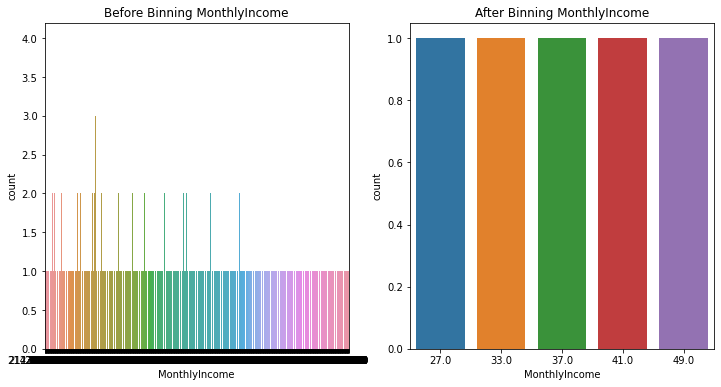

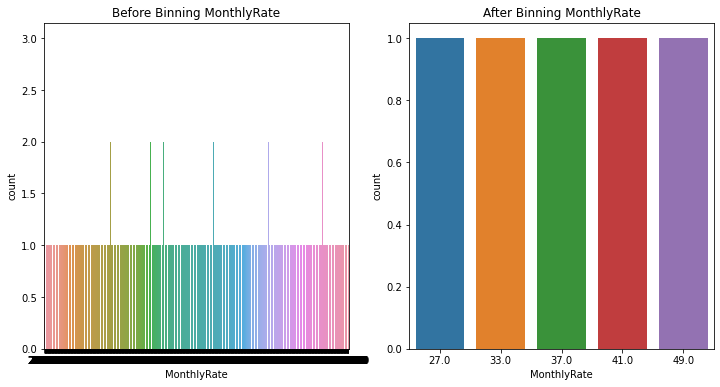

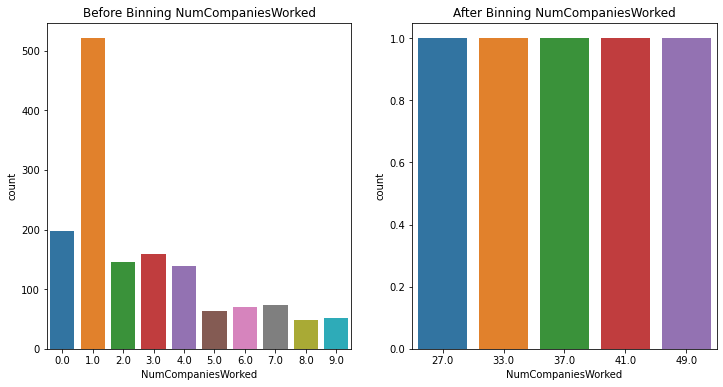

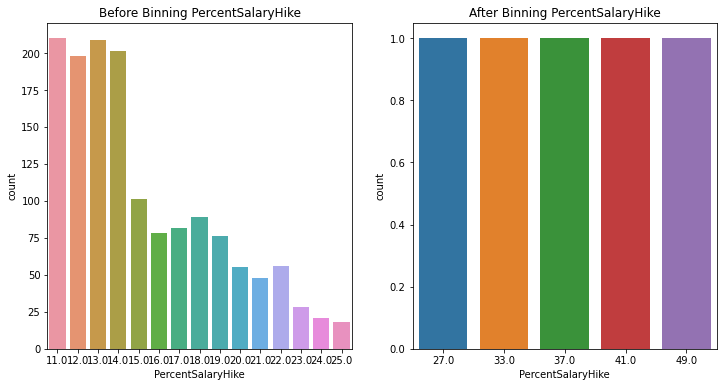

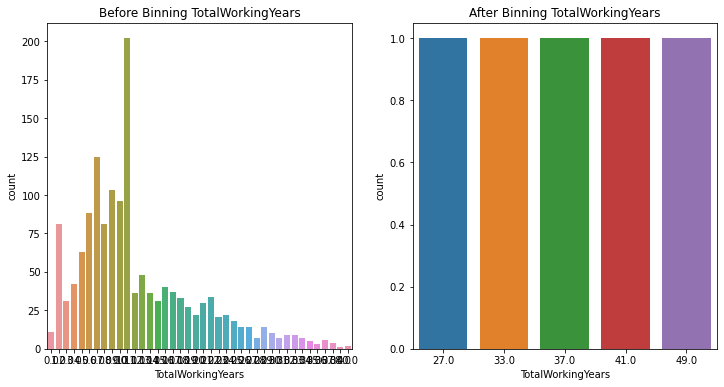

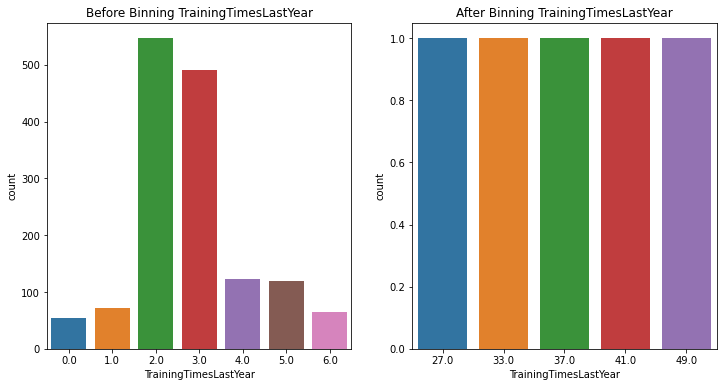

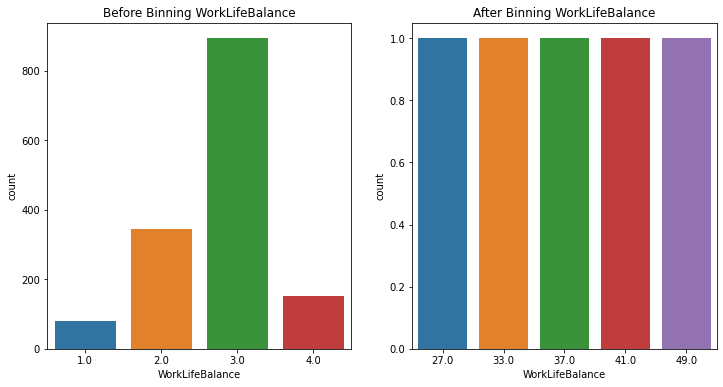

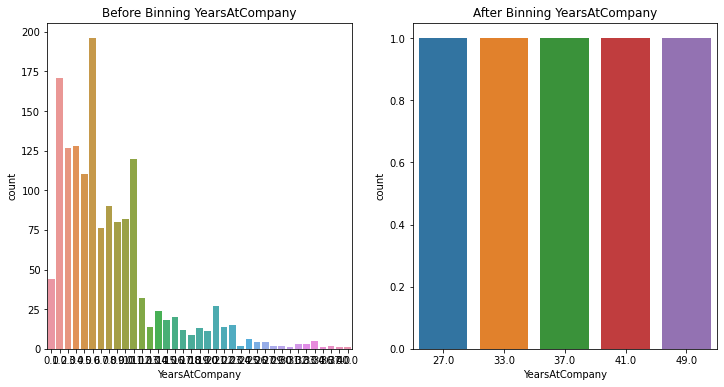

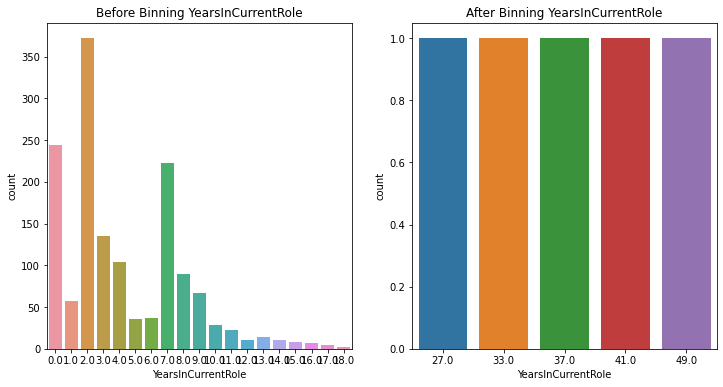

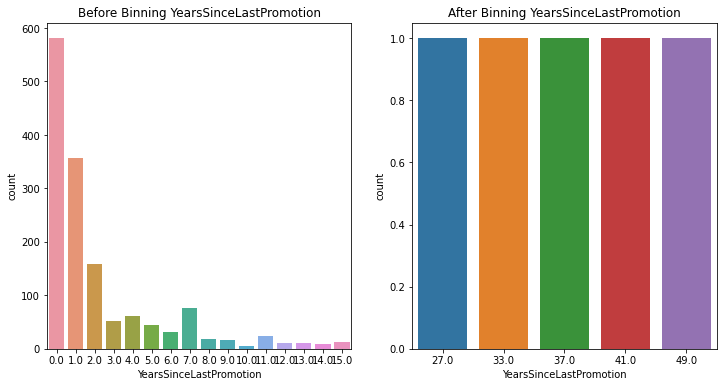

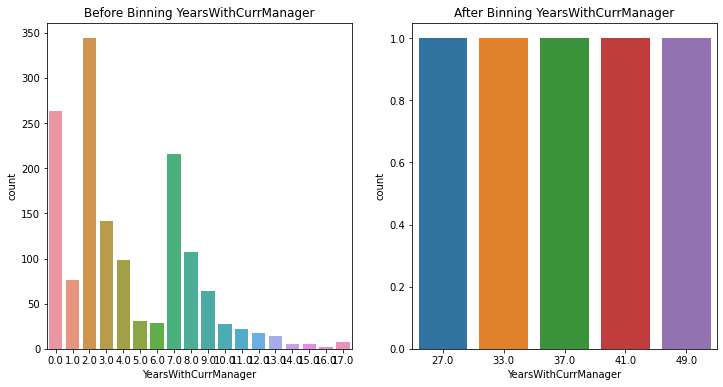

In [122]:
make_plots(df77, df777)

# Réduction des données / Elimination des redondances horizontales et verticales

##### Horizontales

In [123]:
df.drop_duplicates(keep='first', inplace=True)
len(df)

1470

##### verticales


In [124]:
#on commence par les attributs qui ont une seule valeur
dbefore = df.copy()
for d in df.columns:
    if len(df[d].unique())==1:
        df.drop(d, inplace=True, axis = 1)
print(f" Before : {len(dbefore.columns)}    After : {len(df.columns)}")

 Before : 35    After : 32


### Methodes de feature selection

##### Filter based selection : correlation (chi2 & point biserial)

In [128]:
df.Attrition.unique() #puisque nous avons affaire à une variable catégorique, nous optons pour chi-2 afin d'étudier son taux de correlation avec les autres attributs

array(['Yes', 'No'], dtype=object)

In [134]:
for d in df.columns:
    print(f"Attribut : {d}\n Type : {df[d].dtype}\n  Values : {df[d].unique()}\n .....................\n ")

Attribut : Age
 Type : float64
  Values : [41. 49. 37. 33. 27. 32. 59. 30. 38. 36. 35. 29. 31. 34. 28. 22. 53. 24.
 21. 42. 44. 46. 39. 43. 50. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58. 20.
 25. 19. 57. 52. 47. 18. 60.]
 .....................
 
Attribut : Attrition
 Type : object
  Values : ['Yes' 'No']
 .....................
 
Attribut : BusinessTravel
 Type : object
  Values : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
 .....................
 
Attribut : DailyRate
 Type : float64
  Values : [1102.  279. 1373. 1392.  591. 1005. 1324. 1358.  216. 1299.  809.  153.
  670. 1346.  103. 1389.  334. 1123. 1219.  371.  673. 1218.  419.  391.
  699. 1282. 1125.  691.  477.  705.  924. 1459.  125.  895.  813. 1273.
  869.  890.  852. 1141.  464. 1240. 1357.  994.  721. 1360. 1065.  408.
 1211. 1229.  626. 1434. 1488. 1097. 1443.  515.  853. 1142.  655. 1115.
  427.  653.  989. 1435. 1223.  836. 1195. 1339.  664.  318. 1225. 1328.
 1082.  548.  132.  746.  776.  193.  397.  945. 1214.  11

In [225]:
# import libraries
import numpy as np 
import pandas as pd
import scipy
from scipy.stats import chi2

In [226]:
categorical = df.select_dtypes(include=['object'])
categorical.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [302]:
def chi2_feature_selection_scratch(df, detail):    
    feat = []
    for d in df.columns[2:]:
        #---create the contingency table---
        df_cont = pd.crosstab(index = df['Attrition'], columns = df[d])
        
        if detail:
            print('---Contingency table (T)---')
            display(df_cont)


        #---calculate degree of freedom---(dof)
        degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)

        #---sum up the totals for row and columns---
        df_cont.loc[:,'Total']= df_cont.sum(axis=1)
        df_cont.loc['Total']= df_cont.sum()
        
        if detail:   
            print('---Observed (O)---') 
            display(df_cont)



        #---create the expected value dataframe---
        df_exp = df_cont.copy()    
        df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
        
        if detail:   
            print('---Expected (E)---') 
            display(df_exp)


        # calculate chi-square values
        df_chi2 = ((df_cont - df_exp)**2) / df_exp    
        df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
        df_chi2.loc['Total']= df_chi2.sum()
        
        if detail:   
            print('---Chi-Square---') 
            display(df_chi2)

        df_chi2_yates = ((np.abs(df_cont - df_exp)-0.5)**2) / df_exp    
        df_chi2_yates.loc[:,'Total']= df_chi2_yates.sum(axis=1)
        df_chi2_yates.loc['Total']= df_chi2_yates.sum()
        
        if detail:   
            print('---Chi-Square---') 
            display(df_chi2_yates)


        #---get chi-square score---   
        chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    
        feat.append((d,chi_square_score))
    return feat

In [371]:
feats =chi2_feature_selection_scratch(categorical,detail=False)

In [372]:
ats=[]
vs=[]
for k,v in feats:
    ats.append(k)
    vs.append(v)

In [381]:
from scipy.stats import chi2_contingency # import Scipy's built-in function

def categorical_feature_selection(df):
    feat=[]
    
    for d in df.columns[1:]:
        cont = pd.crosstab(index=df['Attrition'], columns=df[d], margins =True)
        tstat_scipy,pval_scipy,ddof_scipy,exp_scipy=chi2_contingency(cont, correction=False) # "correction=False" means no Yates' correction is used! 
        tstat_scipy_yates,pval_scipy_yates,ddof_scipy_yates,exp_scipy_yates=chi2_contingency(cont, correction=True)# "correction=True" to apply Yates' correction

        feat.append((d,pval_scipy,tstat_scipy,pval_scipy_yates,tstat_scipy_yates,ddof_scipy))
    return feat
categorical_feature_selection(categorical)
        

[('BusinessTravel',
  0.0004834056309031592,
  24.182413685655174,
  0.0004834056309031592,
  24.182413685655174,
  6),
 ('Department',
  0.094889413229254,
  10.79600732241067,
  0.094889413229254,
  10.79600732241067,
  6),
 ('EducationField',
  0.1901085546245391,
  16.024674119585427,
  0.1901085546245391,
  16.024674119585427,
  12),
 ('Gender',
  0.8655661914618858,
  1.2752163602205182,
  0.8655661914618858,
  1.2752163602205182,
  4),
 ('JobRole',
  6.925877932979031e-11,
  86.19025367670434,
  6.925877932979031e-11,
  86.19025367670434,
  18),
 ('MaritalStatus',
  2.7465183491705955e-08,
  46.163676540848705,
  2.7465183491705955e-08,
  46.163676540848705,
  6),
 ('OverTime',
  2.101784517286292e-18,
  89.04387862461931,
  2.101784517286292e-18,
  89.04387862461931,
  4)]

######  Now numerical variables 

In [377]:
numeric = df.select_dtypes(include=['float64'])
len(numeric.columns)

24

In [379]:
X = pd.get_dummies(data=df['Attrition'], drop_first=True) #1==yes
X = X.rename({'Yes':'Attrition'}, axis=1)
X.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [395]:
numeric['Attrition'] = X.squeeze()
numeric.head(1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41.0,1102.0,1.0,2.0,1.0,2.0,94.0,3.0,2.0,4.0,...,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1


In [402]:
def pbc_scratch(data):
    featss =[]

    for d in data.columns[:-2]:
        bd_unique = data['Attrition'].unique()

        g0 = data[data['Attrition'] == bd_unique[0]][d]
        g1 = data[data['Attrition'] == bd_unique[1]][d]

        s_y = np.std(data[d])
        n = len(data['Attrition'])
        n0 = len(g0)
        n1 = len(g1)
        m0 = g0.mean()
        m1 = g1.mean()

        featss.append((d,(m0-m1)*math.sqrt((n0*n1)/n**2)/s_y))
    return featss
featss=pbc_scratch(numeric)


In [404]:
#essai avec fonction predefinie
import pandas as pd
from scipy.stats import pointbiserialr

# get data
data = numeric.copy()

# get continuous and dichotomous data
continuous = data['Age']
target = data['Attrition']

# pbc of first question
pbc = pointbiserialr(target, continuous)
print(pbc)

PointbiserialrResult(correlation=-0.1592050068657792, pvalue=8.356308021102771e-10)


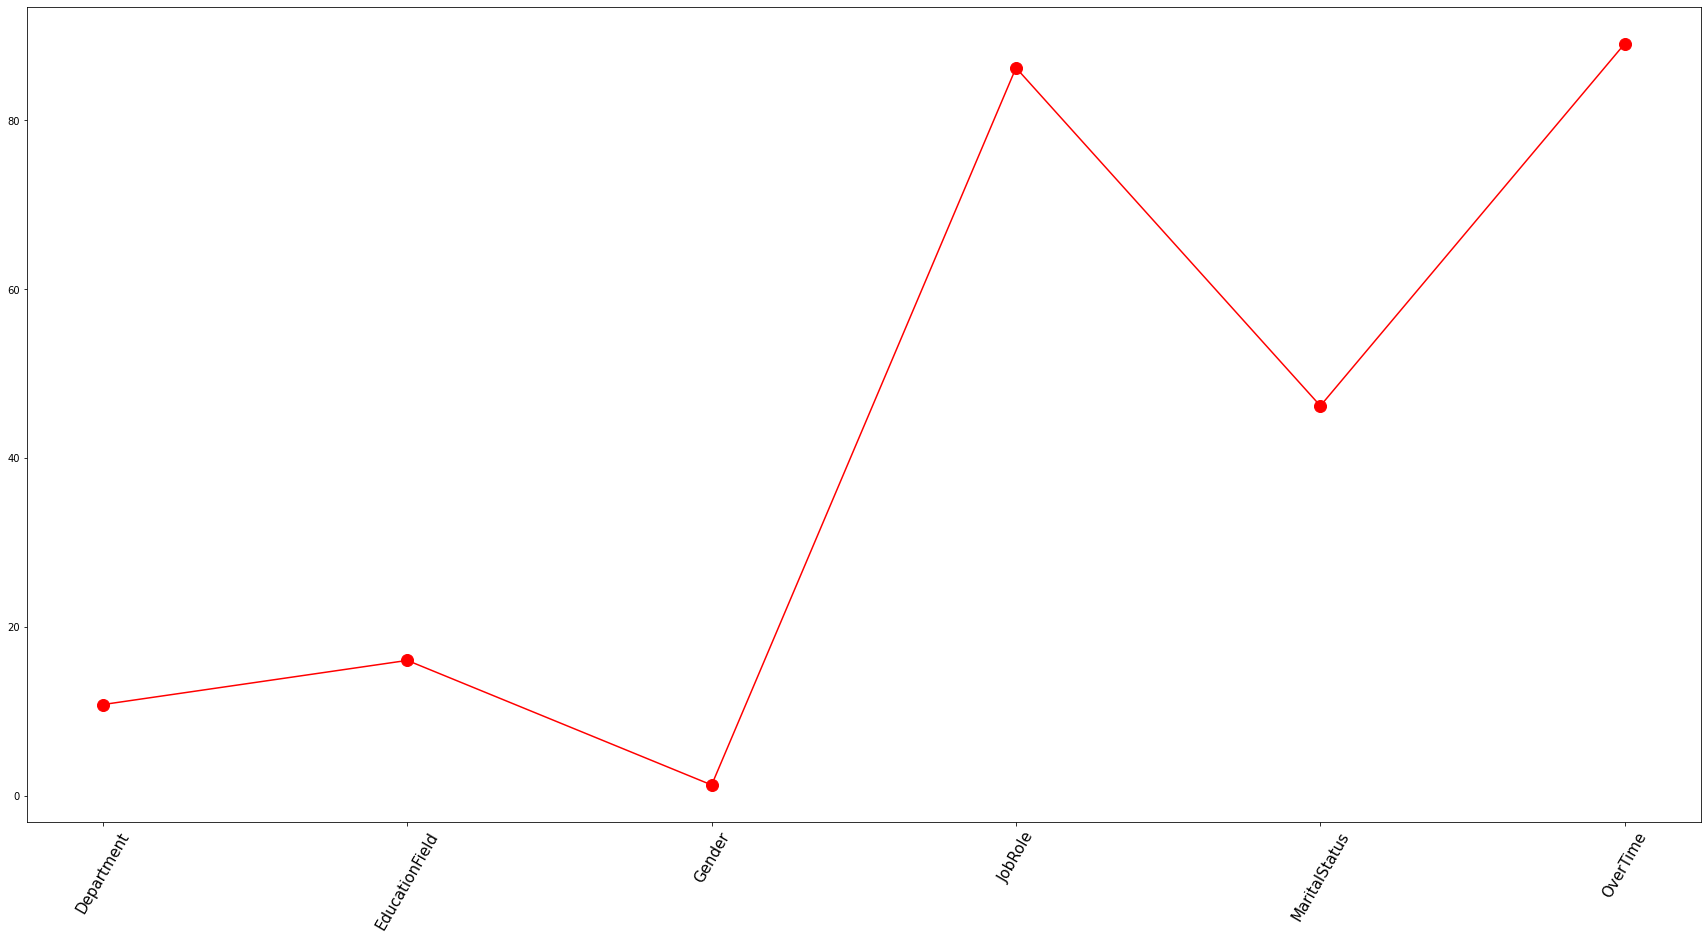

In [380]:
from turtle import color
import matplotlib.pyplot as pl
def visualize(ats,vs):
    x = [i for i in range(len(ats))]
    xTicks = ats
    y = vs
    pl.figure(figsize=(30,15))
    pl.xticks(x, xTicks)
    pl.xticks(range(len(ats)), xTicks, rotation=60,size=15) #writes strings with 45 degree angle
    pl.plot(x,y,marker='o',markersize=12, color='red')
    pl.show()
visualize(ats,vs)

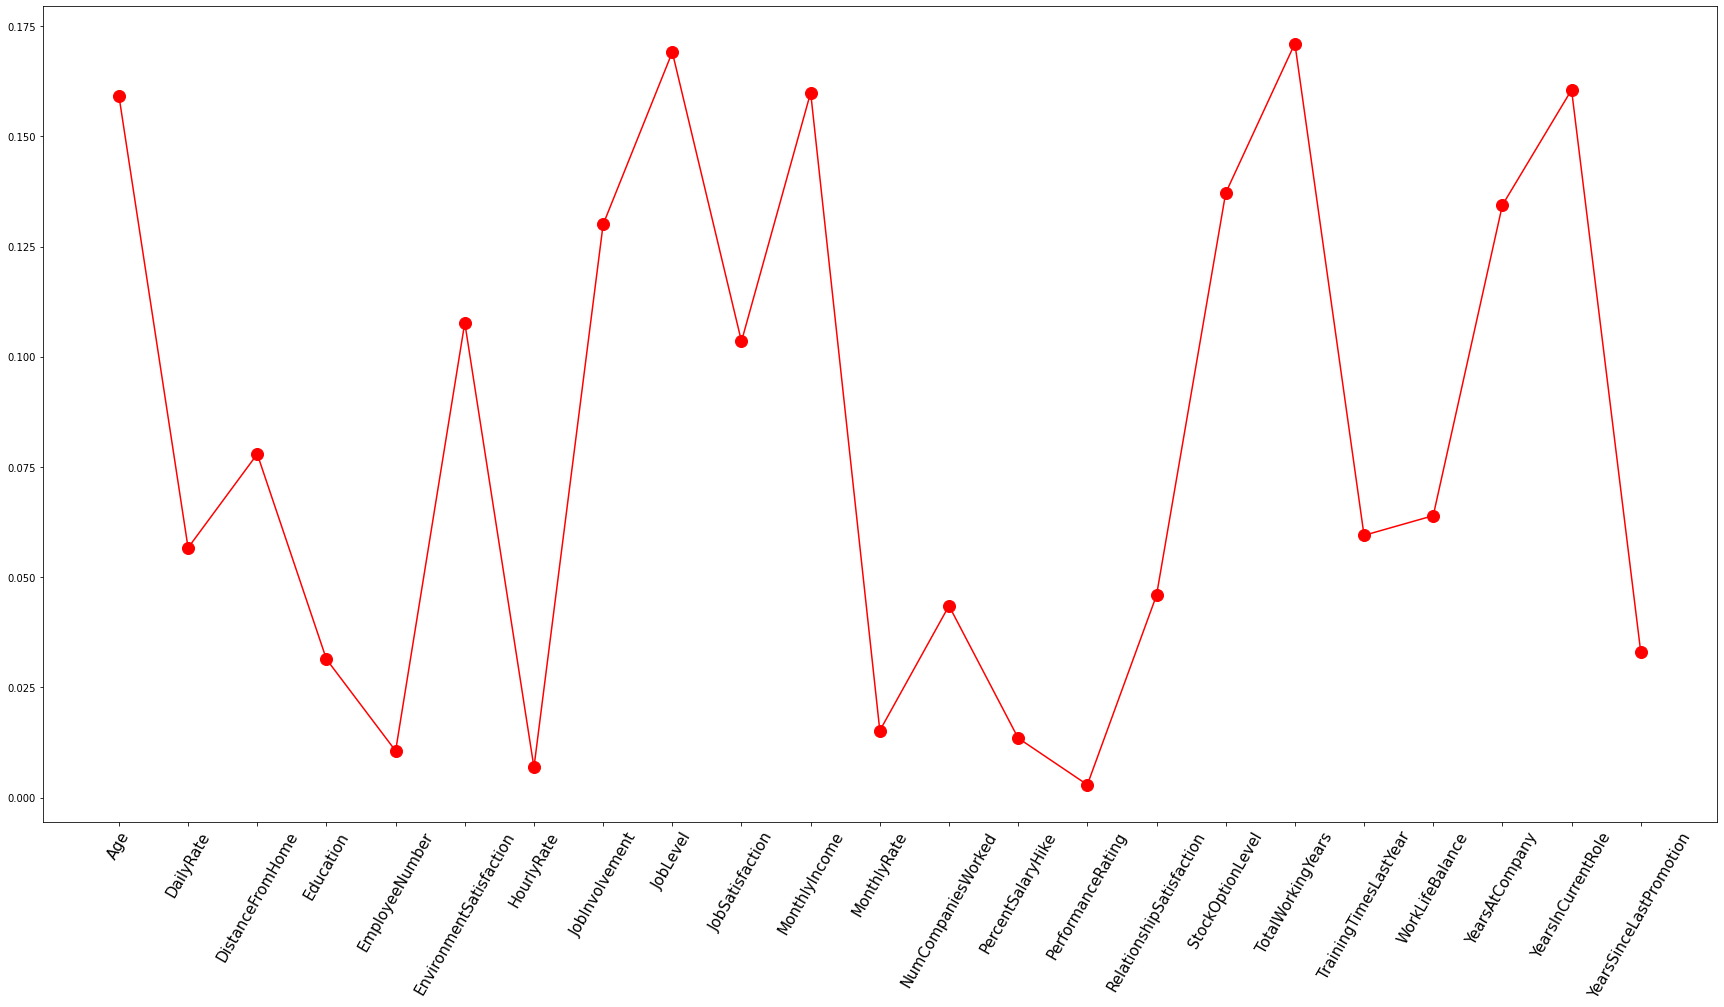

In [403]:
atts=[]
vvs=[]
for kk,vv in featss:
    atts.append(kk)
    vvs.append(abs(vv)) 
visualize(atts,vvs)

In [376]:
#creating our new df with the best attributes
newdf= pd.DataFrame(df['Attrition'])
for k,v in feats:
    if v>50:
        newdf[k] =df[k]    
print(len(newdf.columns))
print(newdf.columns)

3
Index(['Attrition', 'JobRole', 'OverTime'], dtype='object')


In [408]:
#creating our new df with the best attributes
for kk,vv in featss:
    if abs(vv)>0.1:
        newdf[kk] =df[kk]    
print(len(newdf.columns))
print(newdf.columns)

13
Index(['Attrition', 'JobRole', 'OverTime', 'Age', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')


##### Wraper based selection : Recursive feature selection

##### Embedded selection : models with predefined selection methods

# Normalisation de données

## Min-Max

## Z-score